In [1]:
#Mark
# Install the required libraries
#!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
#Mark
from prophet import Prophet
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Read the 5 csv files as DataFrames, with the first date as index
# Name them AAPL, COMP, GOOGL, MSFT and SPX

msft_df = pd.read_csv('Resources/MSFT-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

aapl_df = pd.read_csv('Resources/AAPL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

googl_df = pd.read_csv('Resources/GOOGL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

comp_df = pd.read_csv('Resources/COMP-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

spx_df = pd.read_csv('Resources/SPX-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

In [4]:
# Preview all 5 datasets to ensure that all column names match and that there is no null data
display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())
# One of the interesting things to note is that the way that the file came down is that the latest date is ontop of the file

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [5]:
# Cleanup CSV's and and keep only the closing price and volume
msft_df.info()
aapl_df.info()
googl_df.info()
comp_df.info()
spx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-0

In [6]:
#Rename Close/Last column to company_close
msft_df = msft_df.rename(columns={'Close/Last': 'msft_close'})
aapl_df = aapl_df.rename(columns={'Close/Last': 'aapl_close'})
googl_df = googl_df.rename(columns={'Close/Last': 'googl_close'})
comp_df = comp_df.rename(columns={'Close/Last': 'comp_close'})
spx_df = spx_df.rename(columns={'Close/Last': 'spx_close'})
#aapl_df.head()
display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())

,msft_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,aapl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,googl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,comp_close,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,spx_close,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [7]:
# Merge the Dataframes into one - call it MERGED
merged_df = pd.concat([msft_df['msft_close'], aapl_df['aapl_close'], googl_df['googl_close'], comp_df['comp_close'], spx_df['spx_close']], axis=1).dropna()

In [8]:
#Preview the merged df; look at info
display(merged_df.head(), merged_df.tail(), merged_df.info())
# Please see the previous point, after the merge the dates in head are the oldest dates

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   object 
 1   aapl_close   1258 non-null   object 
 2   googl_close  1258 non-null   object 
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(2), object(3)
memory usage: 59.0+ KB


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,$135.67,$56.10,$59.5065,7823.78,2893.06
2019-10-09,$138.24,$56.7575,$60.12,7903.74,2919.40
2019-10-10,$139.10,$57.5225,$60.4735,7950.78,2938.13
2019-10-11,$139.68,$59.0525,$60.7855,8057.04,2970.27
2019-10-14,$139.55,$58.9675,$60.8885,8048.65,2966.15


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,$420.69,$226.21,$166.99,17910.36,5708.75
2024-10-02,$417.13,$226.78,$165.86,17925.12,5709.54
2024-10-03,$416.54,$225.67,$165.86,17918.48,5699.94
2024-10-04,$416.06,$226.80,$167.06,18137.85,5751.07
2024-10-07,$409.54,$221.69,$162.98,17923.90,5695.94


None

In [9]:
#Remove dollar signs
merged_df['msft_close'] = merged_df['msft_close'].str.replace('$', '', regex=False)
merged_df['aapl_close'] = merged_df['aapl_close'].str.replace('$', '', regex=False)
merged_df['googl_close'] = merged_df['googl_close'].str.replace('$', '', regex=False)

#Verify conversion to float
merged_df.head()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.5065,7823.78,2893.06
2019-10-09,138.24,56.7575,60.12,7903.74,2919.40
2019-10-10,139.10,57.5225,60.4735,7950.78,2938.13
2019-10-11,139.68,59.0525,60.7855,8057.04,2970.27
2019-10-14,139.55,58.9675,60.8885,8048.65,2966.15


In [10]:
#Make close columns dtype float64 and round to 2 decimal places
merged_df[['msft_close', 'aapl_close', 'googl_close']] = merged_df[['msft_close', 'aapl_close', 'googl_close']].astype(float).round(2)
merged_df.head()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.51,7823.78,2893.06
2019-10-09,138.24,56.76,60.12,7903.74,2919.40
2019-10-10,139.10,57.52,60.47,7950.78,2938.13
2019-10-11,139.68,59.05,60.79,8057.04,2970.27
2019-10-14,139.55,58.97,60.89,8048.65,2966.15


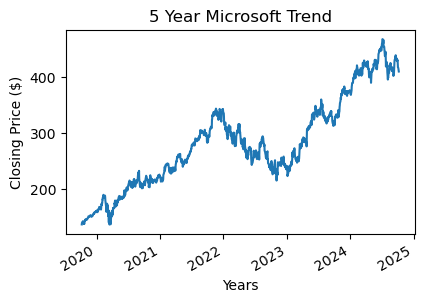

In [11]:
#Marianne - Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# Microsoft
merged_df['msft_close'].plot(figsize=(4.5,3),title="5 Year Microsoft Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/msft5yr.png')

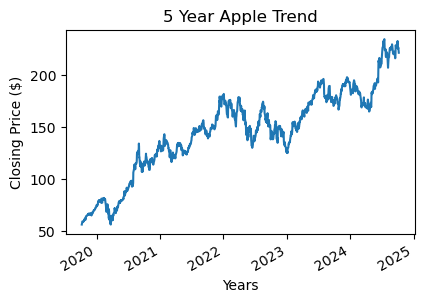

In [12]:
#Marianne - Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# AAPL
merged_df['aapl_close'].plot(figsize=(4.5,3),title="5 Year Apple Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/aapl5yr.png')

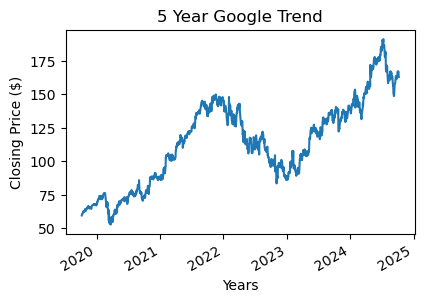

In [13]:
#Marianne - Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# GOOGL
merged_df['googl_close'].plot(figsize=(4.5,3),title="5 Year Google Trend", xlabel='Years', ylabel='Closing Price ($)')
plt.savefig('Resources/googl5yr.png')

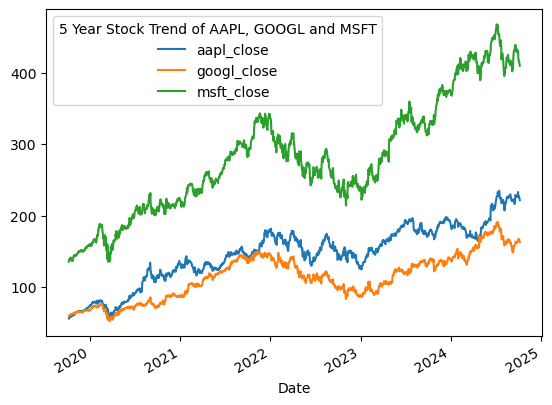

In [14]:
#Marianne - Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
merged_df['aapl_close' ].plot()
merged_df['googl_close'].plot()
merged_df['msft_close'].plot()
plt.legend(title = '5 Year Stock Trend of AAPL, GOOGL and MSFT')

In [15]:
#Marianne - Plot historical trends of the 3 tech stocks, along with calculating mean & standard deviation (see pg 7 of the powerpoint)
# calculate mean & standard deviation
merged_df.describe()

,msft_close,aapl_close,googl_close,comp_close,spx_close
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,281.252258,146.065413,113.876359,12907.457576,4127.005079
std,80.222572,41.330858,31.746797,2540.924738,710.477256
min,135.420000,56.090000,52.710000,6860.670000,2237.400000
25%,222.630000,124.372500,88.090000,11150.130000,3692.277500
50%,272.355000,149.125000,115.345000,13117.800000,4146.545000
75%,331.815000,174.597500,137.625000,14662.875000,4519.332500
max,467.560000,234.820000,191.180000,18647.450000,5762.480000


In [16]:
# Pete - Plot correlation of stocks; drill into 2024 performance (see pg 8 of powerpoint)
# Step 1 - Filter out 2024
df_2024 = merged_df[merged_df.index.year == 2024]
display(df_2024.head())
display(df_2024.tail())
merged_df.info()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,370.87,185.64,138.17,14765.94,4742.83
2024-01-03,370.60,184.25,138.92,14592.21,4704.81
2024-01-04,367.94,181.91,136.39,14510.30,4688.68
2024-01-05,367.75,181.18,135.73,14524.07,4697.24
2024-01-08,374.69,185.56,138.84,14843.77,4763.54


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,420.69,226.21,166.99,17910.36,5708.75
2024-10-02,417.13,226.78,165.86,17925.12,5709.54
2024-10-03,416.54,225.67,165.86,17918.48,5699.94
2024-10-04,416.06,226.80,167.06,18137.85,5751.07
2024-10-07,409.54,221.69,162.98,17923.90,5695.94


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   float64
 1   aapl_close   1258 non-null   float64
 2   googl_close  1258 non-null   float64
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


<Axes: title={'center': '2024 Stock and Index Performance'}, xlabel='Date'>

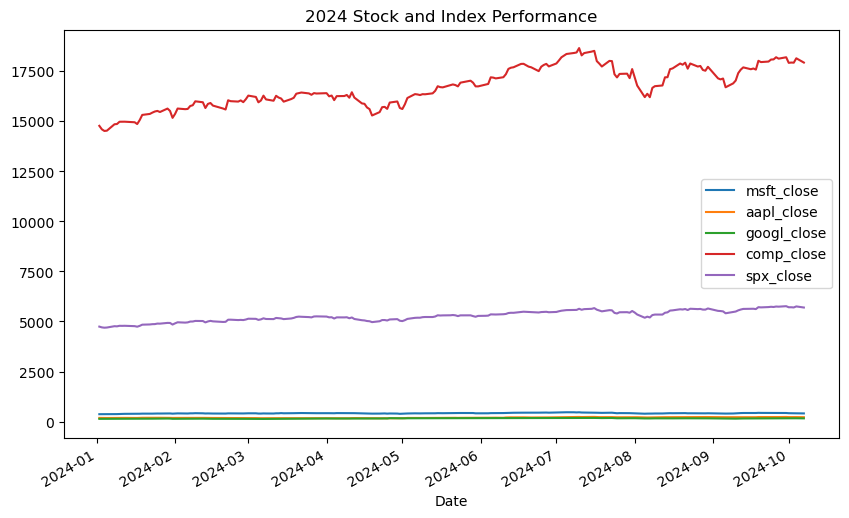

In [17]:
# Pete
# Step 2 - Let's plot it

df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')


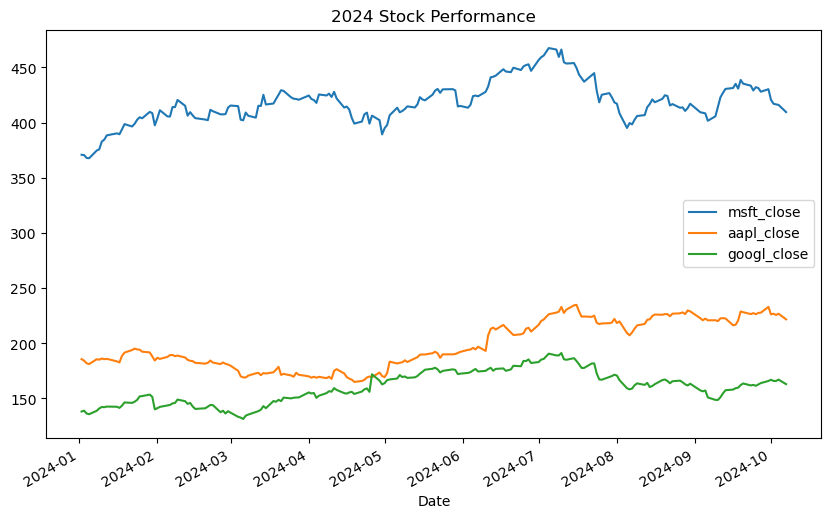

In [18]:
# Pete
# Step 2.5 - Let's plot it without the indexes

df_2024[['msft_close', 'aapl_close', 'googl_close']].plot(figsize=(10,6), title='2024 Stock Performance')
plt.savefig('Resources/StockPerformance2024.png')

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2024-01-03,0.999272,0.992512,1.005428,0.988234,0.991984
2024-01-04,0.992100,0.979907,0.987117,0.982687,0.988583
2024-01-05,0.991587,0.975975,0.982341,0.983620,0.990388
2024-01-08,1.010300,0.999569,1.004849,1.005271,1.004367
...,...,...,...,...,...
2024-10-01,1.134333,1.218541,1.208584,1.212951,1.203659
2024-10-02,1.124734,1.221612,1.200405,1.213950,1.203826
2024-10-03,1.123143,1.215632,1.200405,1.213501,1.201801


<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

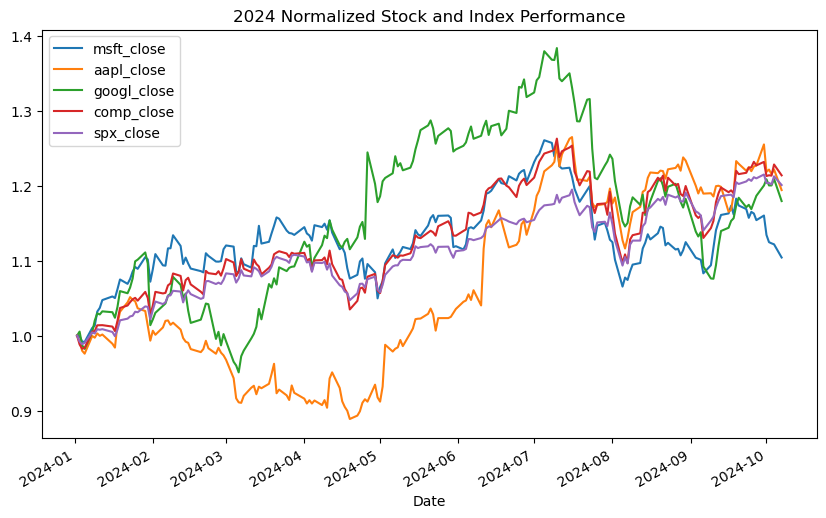

In [19]:
# Pete - Let's normalize the data
#3 Let's normalize the data to the beginning of the year by dividing the first value in each column

df_2024_normalized = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].apply(lambda x: x / x.iloc[0])
display(df_2024_normalized)

# Plot the data
df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


,msft_close,aapl_close,googl_close
Date,,,
2024-01-02,1.000000,1.000000,1.000000
2024-01-03,0.999272,0.992512,1.005428
2024-01-04,0.992100,0.979907,0.987117
2024-01-05,0.991587,0.975975,0.982341
2024-01-08,1.010300,0.999569,1.004849
...,...,...,...
2024-10-01,1.134333,1.218541,1.208584
2024-10-02,1.124734,1.221612,1.200405
2024-10-03,1.123143,1.215632,1.200405


<Axes: title={'center': '2024 Normalized Stock Performance'}, xlabel='Date'>

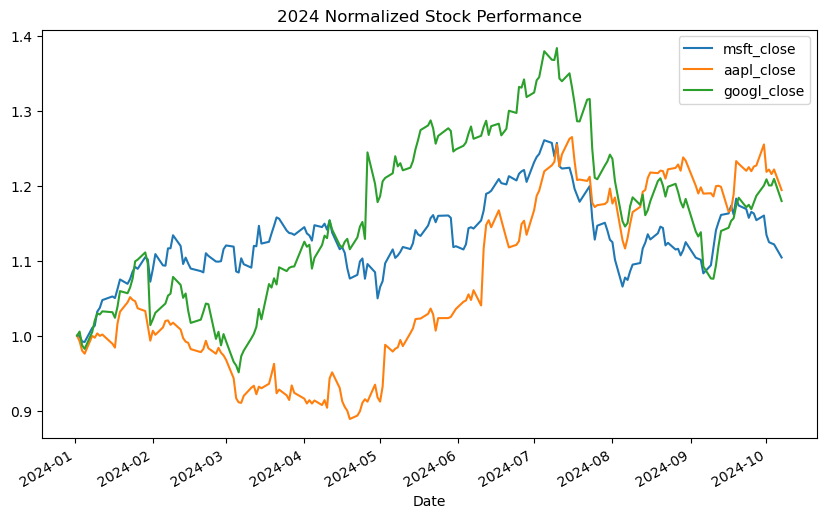

In [20]:
# Pete - Let's normalize the data for stocks only
#3.5 Let's normalize the data to the beginning of the year by dividing the first value in each column

df_2024_normalized_stocks = df_2024[['msft_close', 'aapl_close', 'googl_close']].apply(lambda x: x / x.iloc[0])
display(df_2024_normalized_stocks)

# Plot the data
df_2024_normalized_stocks.plot(figsize=(10,6), title='2024 Normalized Stock Performance')

,msft_close,aapl_close,googl_close
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.000728,-0.007488,0.005428
2024-01-04,-0.007178,-0.012700,-0.018212
2024-01-05,-0.000516,-0.004013,-0.004839
2024-01-08,0.018872,0.024175,0.022913
...,...,...,...
2024-10-01,-0.022333,-0.029142,0.006874
2024-10-02,-0.008462,0.002520,-0.006767
2024-10-03,-0.001414,-0.004895,0.000000


<Axes: title={'center': 'Daily Percentage Returns of MSFT, AAPL, and GOOGL in 2024'}, xlabel='Date'>

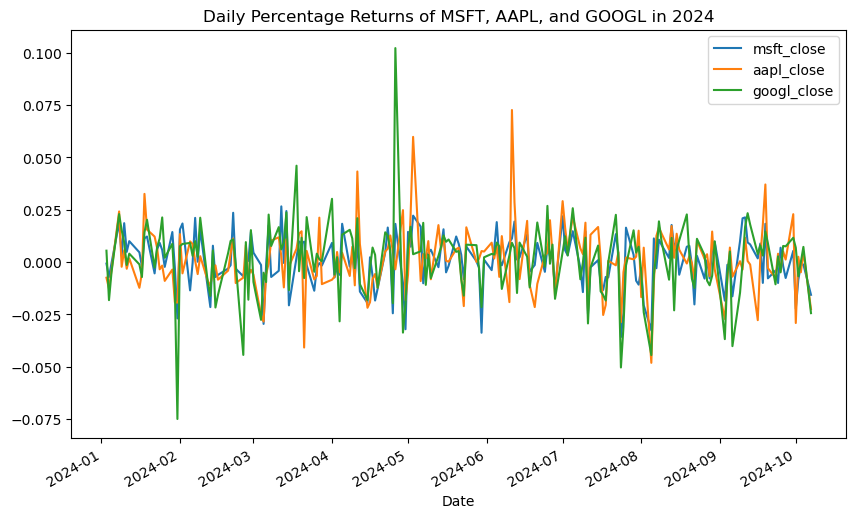

In [21]:
# Pete - Let's analyze the data
#4 - Calculate daily percentage returns for the stocks and plot it
df_2024_returns = df_2024[['msft_close', 'aapl_close', 'googl_close']].pct_change()
display(df_2024_returns)
df_2024_returns.plot(figsize=(10, 6), title='Daily Percentage Returns of MSFT, AAPL, and GOOGL in 2024')

"\nThe .cumprod() function in pandas calculates \nthe cumulative product of a series. \nIt's often used in finance to calculate cumulative \nreturns by multiplying daily returns over time.\n\nFor example, if a stock grows 5% on Day 1 and 2% \non Day 2, .cumprod() multiplies these growth \nfactors (1.05 * 1.02) to show cumulative growth. \nIt tracks how much an investment increases or \ndecreases over time, assuming all returns \nare reinvested.\n\nIn short, .cumprod() is useful for analyzing \ncumulative growth, especially for investment returns.\n"

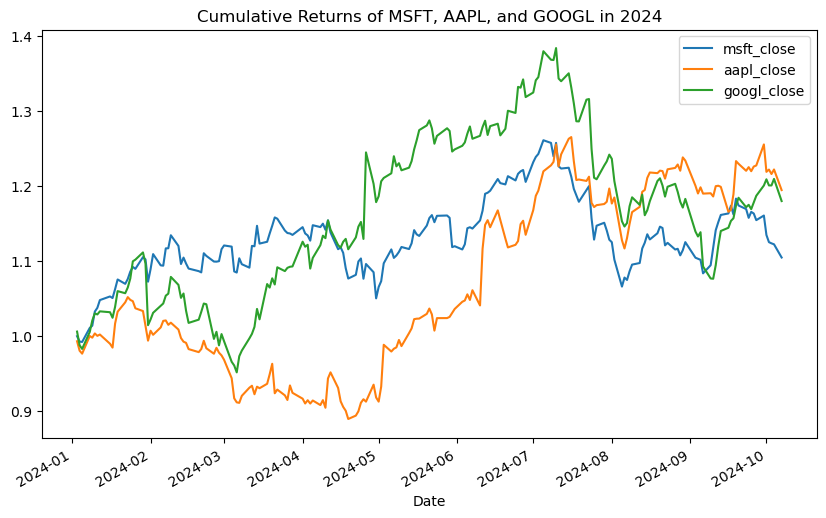

In [22]:
# Pete - Analyze the data
#5 - Calculate cumulative returns to see overall performance growth

df_2024_cumulative = (1 + df_2024_returns).cumprod()

df_2024_cumulative.plot(figsize=(10,6), title='Cumulative Returns of MSFT, AAPL, and GOOGL in 2024')
df_2024_cumulative = (1 + df_2024_returns).cumprod()
plt.savefig('Resources/cumulativereturns.png')

"""
The .cumprod() function in pandas calculates 
the cumulative product of a series. 
It's often used in finance to calculate cumulative 
returns by multiplying daily returns over time.

For example, if a stock grows 5% on Day 1 and 2% 
on Day 2, .cumprod() multiplies these growth 
factors (1.05 * 1.02) to show cumulative growth. 
It tracks how much an investment increases or 
decreases over time, assuming all returns 
are reinvested.

In short, .cumprod() is useful for analyzing 
cumulative growth, especially for investment returns.
"""


In [23]:
# Pete - Calculate correlation between the three stocks
#6 Correlation index

correlation_matrix = df_2024_returns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             msft_close  aapl_close  googl_close
msft_close     1.000000    0.461353     0.611729
aapl_close     0.461353    1.000000     0.390037
googl_close    0.611729    0.390037     1.000000


In [24]:
#Pete
# 7 Summary
'''
**Summary:  The correlation matrix shows how the daily returns of Microsoft, Apple, and Google relate to each other in 2024:**

- **Microsoft and Apple (0.46)**: There’s a moderate positive relationship, meaning they sometimes move in the same direction but not strongly aligned.
- **Microsoft and Google (0.61)**: A stronger positive relationship, indicating that their returns tend to move together more often.
- **Apple and Google (0.39)**: A weak positive relationship, showing that their returns are relatively independent.

### Summary:
- **Microsoft and Google** are the most aligned.
- **Apple** is more independent, with weaker correlations to both Microsoft and Google.
'''

'\n**Summary:  The correlation matrix shows how the daily returns of Microsoft, Apple, and Google relate to each other in 2024:**\n\n- **Microsoft and Apple (0.46)**: There’s a moderate positive relationship, meaning they sometimes move in the same direction but not strongly aligned.\n- **Microsoft and Google (0.61)**: A stronger positive relationship, indicating that their returns tend to move together more often.\n- **Apple and Google (0.39)**: A weak positive relationship, showing that their returns are relatively independent.\n\n### Summary:\n- **Microsoft and Google** are the most aligned.\n- **Apple** is more independent, with weaker correlations to both Microsoft and Google.\n'

In [25]:
#Ethan - Forecast/Predict stock trends of Apple (see pg 9 of powerpoint)

#Make new dataframe with AAPL data and reset index
aapl_prophet = aapl_df.reset_index()

#Make new dataframe with only relevant columns
aapl_prophet = aapl_prophet.drop(['Volume', 'Open', 'High', 'Low'], axis=1)

#Rename column names to match Prophet format
aapl_prophet.columns = ["ds", "y"]

#Drop any rows without data
aapl_prophet = aapl_prophet.dropna()

#Remove '$' from 'y' column and convert to floating point, preview first and last 5 rows
aapl_prophet['y'] = aapl_prophet['y'].str.replace('$','',regex=False).astype('float')
display(aapl_prophet.head())
display(aapl_prophet.tail())


,ds,y
0,2024-10-08,225.77
1,2024-10-07,221.69
2,2024-10-04,226.80
3,2024-10-03,225.67
4,2024-10-02,226.78


,ds,y
1254,2019-10-14,58.9675
1255,2019-10-11,59.0525
1256,2019-10-10,57.5225
1257,2019-10-09,56.7575
1258,2019-10-08,56.1000


In [26]:
#Call Prophet function
aapl_trends = Prophet()

#Fit appl series time series
aapl_trends.fit(aapl_prophet)

#Make new dataframe with predictions 90 days in the future, preview first and last 5 rows
future_aapl_trends = aapl_trends.make_future_dataframe(periods=90, freq='D')
display(future_aapl_trends.head())
display(future_aapl_trends.tail())


19:29:23 - cmdstanpy - INFO - Chain [1] start processing
19:29:23 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2019-10-08
1,2019-10-09
2,2019-10-10
3,2019-10-11
4,2019-10-14


,ds
1344,2025-01-02
1345,2025-01-03
1346,2025-01-04
1347,2025-01-05
1348,2025-01-06


In [27]:
#Make predictions in future dataframe, preview first and last 5 rows
forecast_aapl_trends = aapl_trends.predict(future_aapl_trends)
display(forecast_aapl_trends.head())
display(forecast_aapl_trends.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-08,55.217453,49.552041,66.482342,55.217453,55.217453,2.750538,2.750538,2.750538,-0.042132,-0.042132,-0.042132,2.792670,2.792670,2.792670,0.0,0.0,0.0,57.967991
1,2019-10-09,55.365202,49.778585,66.523989,55.365202,55.365202,2.712965,2.712965,2.712965,-0.042600,-0.042600,-0.042600,2.755565,2.755565,2.755565,0.0,0.0,0.0,58.078167
2,2019-10-10,55.512951,49.849350,66.645735,55.512951,55.512951,2.530465,2.530465,2.530465,-0.176104,-0.176104,-0.176104,2.706569,2.706569,2.706569,0.0,0.0,0.0,58.043416
3,2019-10-11,55.660700,49.488583,66.651018,55.660700,55.660700,2.581093,2.581093,2.581093,-0.064760,-0.064760,-0.064760,2.645853,2.645853,2.645853,0.0,0.0,0.0,58.241793
4,2019-10-14,56.103947,49.888913,67.737914,56.103947,56.103947,2.476821,2.476821,2.476821,0.073994,0.073994,0.073994,2.402828,2.402828,2.402828,0.0,0.0,0.0,58.580768


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1344,2025-01-02,231.073004,224.594740,245.268440,226.953027,236.549091,4.171937,4.171937,4.171937,-0.176104,-0.176104,-0.176104,4.348041,4.348041,4.348041,0.0,0.0,0.0,235.244941
1345,2025-01-03,231.205363,224.853629,246.581609,227.008359,236.820482,3.970476,3.970476,3.970476,-0.064760,-0.064760,-0.064760,4.035236,4.035236,4.035236,0.0,0.0,0.0,235.175839
1346,2025-01-04,231.337722,224.125139,245.533353,226.942879,237.105721,3.859787,3.859787,3.859787,0.125801,0.125801,0.125801,3.733986,3.733986,3.733986,0.0,0.0,0.0,235.197510
1347,2025-01-05,231.470082,224.647938,245.707389,227.027289,237.307479,3.573404,3.573404,3.573404,0.125801,0.125801,0.125801,3.447603,3.447603,3.447603,0.0,0.0,0.0,235.043486
1348,2025-01-06,231.602441,224.373737,245.446098,227.055019,237.539518,3.253216,3.253216,3.253216,0.073994,0.073994,0.073994,3.179222,3.179222,3.179222,0.0,0.0,0.0,234.855657


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


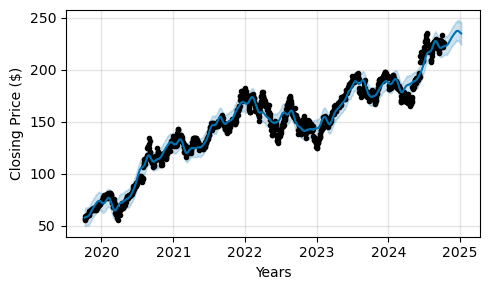

In [28]:
#Graph the prophet predictions
fig1 = aapl_trends.plot(forecast_aapl_trends, figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)')
plt.savefig('Resources/appleforecast.png')


In [29]:
#Set the index future dataframe to the ds datetime column
forecast_aapl_trends = forecast_aapl_trends.set_index('ds')

#View the yhat, yhat_lower, yhat_upper columns in future dataframe
forecast_aapl_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
ds,,,
2019-10-08,57.967991,49.552041,66.482342
2019-10-09,58.078167,49.778585,66.523989
2019-10-10,58.043416,49.849350,66.645735
2019-10-11,58.241793,49.488583,66.651018
2019-10-14,58.580768,49.888913,67.737914


<Axes: xlabel='ds'>

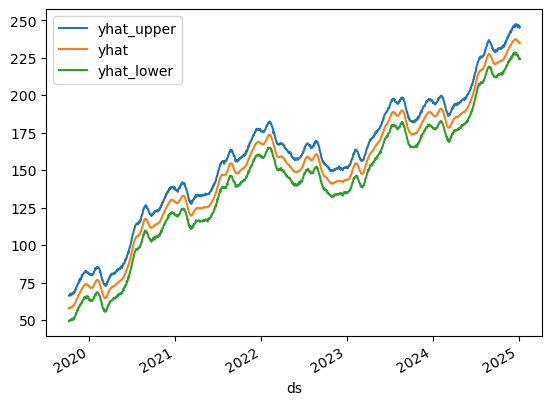

In [30]:
#Graph the last 5 entries in future dataframe yhat, yhat_lower, yhat_upper columns 
forecast_aapl_trends[['yhat_upper', 'yhat', 'yhat_lower']].plot()


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

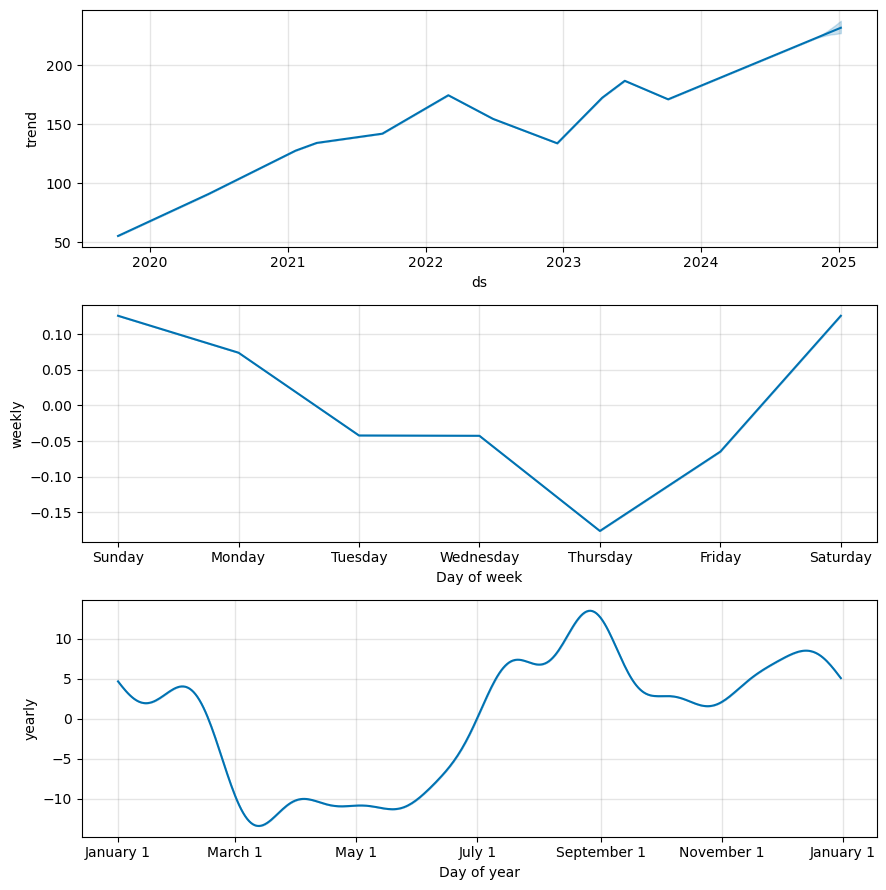

In [31]:
# Reset the index in the forecast_aapl_trends DataFrame
forecast_aapl_trends = forecast_aapl_trends.reset_index()

# visualize the forecast results for the forecast_aapl_trends dataFrame
fig2 = aapl_trends.plot_components(forecast_aapl_trends)




In [32]:
#ETHAN SUMMARY -

In [33]:
#Mark - Forecast/Predict stock trends of Microsoft (see pg 9 of powerpoint)
#Mark - Forecast/Predict stock trends of Microsoft (see pg 9 of powerpoint)
# !!!!!!!!!!!!!!!!!!!!!!!!!!
### reset the index
prophet_msft_df = msft_df.reset_index()

#drop extra columns by index in-place
#data.drop(['one', 'two'], axis=1)
prophet_msft_df.drop(['Volume', 'Open', 'High', 'Low'], axis=1, inplace=True)
prophet_msft_df.head()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_msft_df.columns = ["ds", "y"]
prophet_msft_df.head()

### Drop an NaN values from the prophet_msft_df DataFrame
prophet_msft_df = prophet_msft_df.dropna()

# View the first and last five rows of the msft_prophet_df DataFrame
display(prophet_msft_df.head())
display(prophet_msft_df.tail())

,ds,y
0,2024-10-08,$414.71
1,2024-10-07,$409.54
2,2024-10-04,$416.06
3,2024-10-03,$416.54
4,2024-10-02,$417.13


,ds,y
1254,2019-10-14,$139.55
1255,2019-10-11,$139.68
1256,2019-10-10,$139.10
1257,2019-10-09,$138.24
1258,2019-10-08,$135.67


In [34]:
#Mark - MSFT
# Call the Prophet function, store as an object
m = Prophet()
m

In [35]:
#Mark
#Cleanup the prophet_msft_df data
#For y remove $ and convert to numeric
#df['Sales'] = df['Sales'].str.replace(',','').str.replace('$','').astype('float')
prophet_msft_df['y'] = prophet_msft_df['y'].str.replace('$','').astype('float')

In [36]:
#Mark - MSFT
# Fit the time-series model
m.fit(prophet_msft_df)

19:29:27 - cmdstanpy - INFO - Chain [1] start processing
19:29:28 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
#Mark - MSFT
# Create a future dataframe to hold predictions
# How far?????????????????????????????
#
#future_msft_trends = m.make_future_dataframe(periods=90, freq='day')
future_msft_trends = m.make_future_dataframe(periods=90, freq ='D')

#future_msft_trends.tail()
display(future_msft_trends.head())
display(future_msft_trends.tail())

,ds
0,2019-10-08
1,2019-10-09
2,2019-10-10
3,2019-10-11
4,2019-10-14


,ds
1344,2025-01-02
1345,2025-01-03
1346,2025-01-04
1347,2025-01-05
1348,2025-01-06


In [38]:
#Mark - MSFT
# Make the predictions for the trend data
forecast_msft_trends = m.predict(future_msft_trends)

# Display the first five rows of the forecast_msft_trends DataFrame
forecast_msft_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-08,151.297273,117.964118,144.549441,151.297273,151.297273,-19.875255,-19.875255,-19.875255,3.168227,3.168227,3.168227,-23.043482,-23.043482,-23.043482,0.0,0.0,0.0,131.422018
1,2019-10-09,151.325922,117.868234,146.410027,151.325922,151.325922,-19.271203,-19.271203,-19.271203,3.523466,3.523466,3.523466,-22.794670,-22.794670,-22.794670,0.0,0.0,0.0,132.054719
2,2019-10-10,151.354572,119.324945,145.308022,151.354572,151.354572,-19.059963,-19.059963,-19.059963,3.463180,3.463180,3.463180,-22.523142,-22.523142,-22.523142,0.0,0.0,0.0,132.294609
3,2019-10-11,151.383222,120.485660,148.387295,151.383222,151.383222,-18.563585,-18.563585,-18.563585,3.669374,3.669374,3.669374,-22.232959,-22.232959,-22.232959,0.0,0.0,0.0,132.819636
4,2019-10-14,151.469171,121.315609,146.617111,151.469171,151.469171,-17.803870,-17.803870,-17.803870,3.481192,3.481192,3.481192,-21.285063,-21.285063,-21.285063,0.0,0.0,0.0,133.665300


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


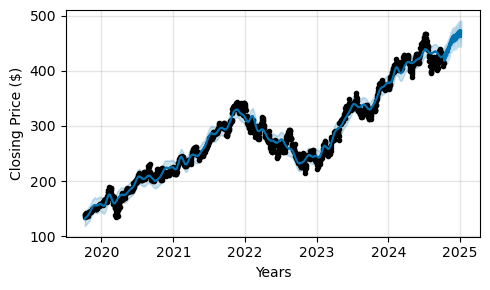

In [39]:
#Mark - MSFT
# Plot the Prophet predictions for the MSFT trends data
m.plot(forecast_msft_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/microsoftforecast.png')

In [40]:
#Mark - MSFT
# Set the index in the forecast_msft_trends DataFrame to the ds datetime column
forecast_msft_trends = forecast_msft_trends.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_msft_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
ds,,,
2019-10-08,131.422018,117.964118,144.549441
2019-10-09,132.054719,117.868234,146.410027
2019-10-10,132.294609,119.324945,145.308022
2019-10-11,132.819636,120.485660,148.387295
2019-10-14,133.665300,121.315609,146.617111


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

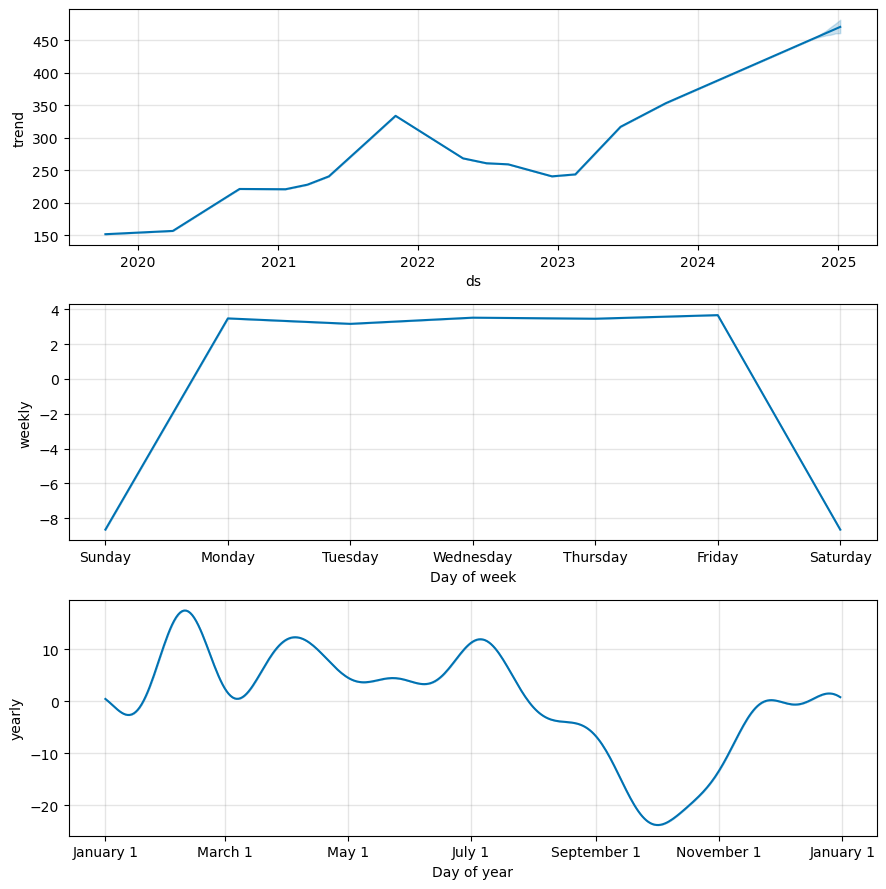

In [41]:
#Mark - MSFT
# Reset the index in the forecast_msft_trends DataFrame
forecast_msft_trends = forecast_msft_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
m.plot_components(forecast_msft_trends);
plt.savefig('Resources/microsoftforecastcomponents.png')


In [42]:
#Marianne - Forecast/Predict stock trends of Google (see pg 9 of powerpoint)
#Marianne - Forecast/Predict stock trends of Google (see pg 9 of powerpoint)
# Filter merged_df for Google only

merged_df_google = pd.DataFrame(merged_df['googl_close'])

# reset index
merged_df_google = merged_df_google.reset_index()

merged_df_google.head()


,Date,googl_close
0,2019-10-08,59.51
1,2019-10-09,60.12
2,2019-10-10,60.47
3,2019-10-11,60.79
4,2019-10-14,60.89


In [43]:
# Marianne - use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_google = merged_df_google.rename(columns={'Date':'ds', 'googl_close':'y'})
#merged_df_google.head()

# create model
model = Prophet()
# fit model
model.fit(merged_df_google)

# create dataframe for predictions
google_predict_df = model.make_future_dataframe(periods=90, freq="D")
# display(google_predict_df).head()
# display(google_predict_df).tail()

# populate dataframe with predictions
google_forecast_trends = model.predict(google_predict_df)

19:29:33 - cmdstanpy - INFO - Chain [1] start processing
19:29:34 - cmdstanpy - INFO - Chain [1] done processing


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


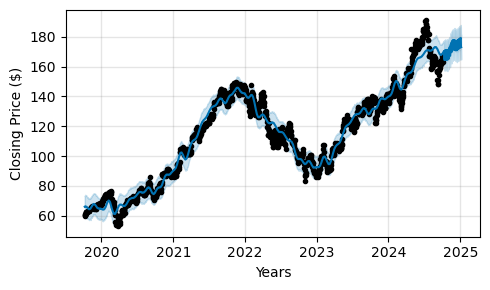

In [44]:
# Marianne- plot the model predictions
fig = model.plot(google_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
#ax = fig.gca()
#ax.set_title('Google 90 Day Forecast')
plt.savefig('Resources/googlepredict.png')

In [45]:
# Marianne - review model predictions and calculate expected growh
#google_forecast_trends.head()
#google_forecast_trends[['ds','yhat']]
g_prediction_filter_01052025 = google_forecast_trends.loc[(google_forecast_trends['ds'] == '2025-01-05')]
yhat_01052025 = g_prediction_filter_01052025.iloc[0, g_prediction_filter_01052025.columns.get_loc('yhat')]

g_prediction_filter_10082024 = google_forecast_trends.loc[(google_forecast_trends['ds'] == '2024-10-09')]
yhat_10092024 = g_prediction_filter_10082024.iloc[0, g_prediction_filter_10082024.columns.get_loc('yhat')]

g_growth = yhat_01052025 - yhat_10092024
g_growthpercent = g_growth / yhat_10092024
g_growthpercent
print(f'Expected growth for Google is: {g_growthpercent * 100:.2} % over the next 90 days')

Expected growth for Google is: 1.7 % over the next 90 days


In [46]:
# perform the same analysis for MSFT - Mark & Marianne

m_prediction_filter_01052025 = forecast_msft_trends.loc[(forecast_msft_trends['ds'] == '2025-01-05')]
yhat_01052025 = m_prediction_filter_01052025.iloc[0, m_prediction_filter_01052025.columns.get_loc('yhat')]

m_prediction_filter_10082024 = forecast_msft_trends.loc[(forecast_msft_trends['ds'] == '2024-10-09')]
yhat_10092024 = m_prediction_filter_10082024.iloc[0, m_prediction_filter_10082024.columns.get_loc('yhat')]

m_growth = yhat_01052025 - yhat_10092024
m_growthpercent = m_growth / yhat_10092024
m_growthpercent
print(f'Expected growth for Microsoft is: {m_growthpercent * 100:.2} % over the next 90 days')



Expected growth for Microsoft is: 7.5 % over the next 90 days


In [47]:
# perform the same analysis for AAPL - Mark & Marianne
#forecast_aapl_trends
a_prediction_filter_01052025 = forecast_aapl_trends.loc[(forecast_aapl_trends['ds'] == '2025-01-05')]
yhat_01052025 = a_prediction_filter_01052025.iloc[0, a_prediction_filter_01052025.columns.get_loc('yhat')]

a_prediction_filter_10082024 = forecast_aapl_trends.loc[(forecast_aapl_trends['ds'] == '2024-10-09')]
yhat_10092024 = a_prediction_filter_10082024.iloc[0, a_prediction_filter_10082024.columns.get_loc('yhat')]

a_growth = yhat_01052025 - yhat_10092024
a_growthpercent = a_growth / yhat_10092024
a_growthpercent
print(f'Expected growth for Apple is: {a_growthpercent * 100:.2} % over the next 90 days')


Expected growth for Apple is: 5.6 % over the next 90 days


In [48]:
# compare the future growth of the 3 stocks
# Backburner; Pete - Plot components of highest performing forecast (pg 10 of powerpoint)

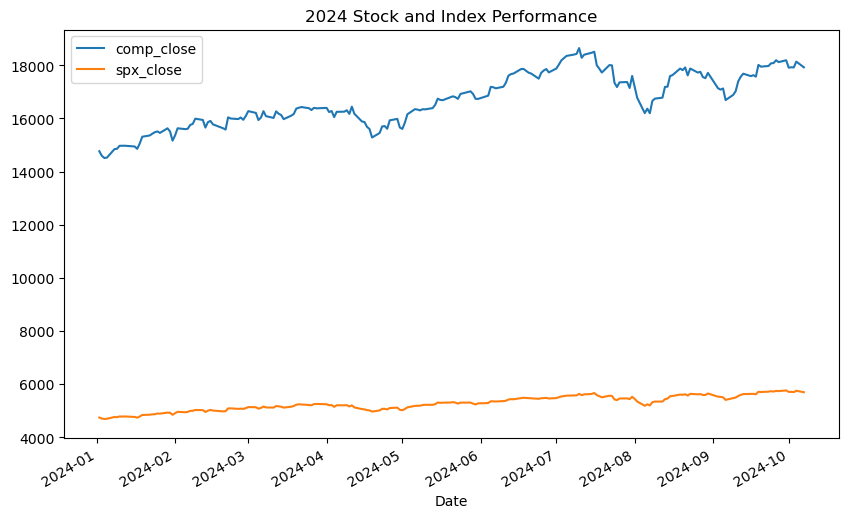

In [49]:
#Steve - Compare these tech stocks to the Nasdaq & S&P 500 indices (pg 11 of powerpoint)

# Steve Step 1 - Plot only the two indices:

df_2024_indices = df_2024[['comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')


<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

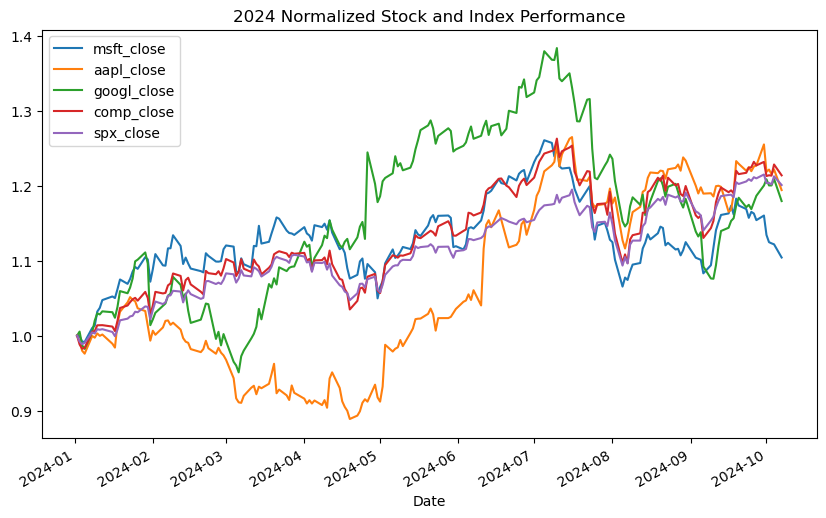

In [50]:
#Steve Step 2 - Plot indices w/ stocks (Pete did this already):

df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


<Axes: title={'center': 'Daily Percentage Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024'}, xlabel='Date'>

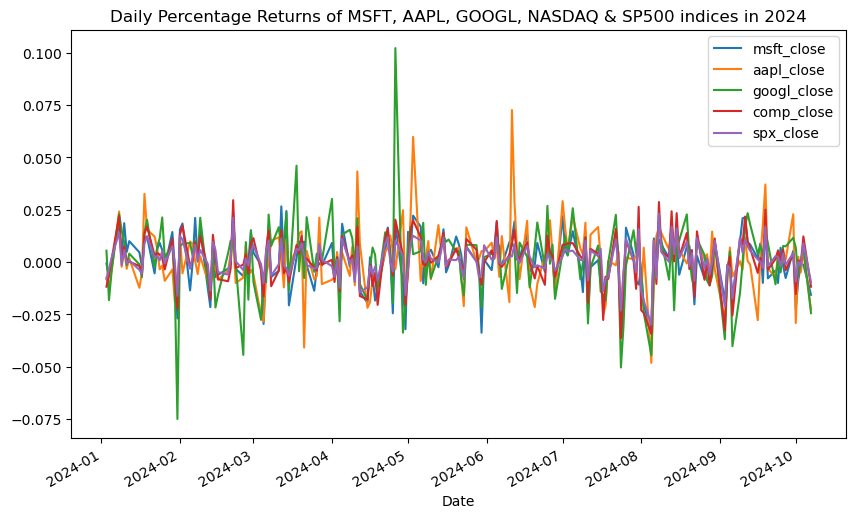

In [51]:
# Steve Step 3 - Calculate daily percentage returns for the stocks and plot it

df_2024_returns_w_indices = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].pct_change()
df_2024_returns_w_indices.plot(figsize=(10, 6), title='Daily Percentage Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024')


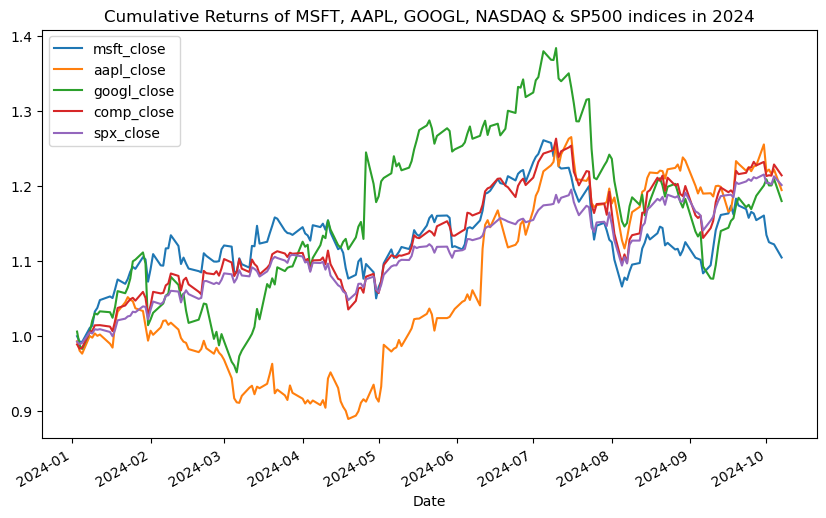

In [52]:
# Steve Step 4 - Calculate cumulative returns to see overall performance growth

df_2024_cumulative_w_indices = (1 + df_2024_returns_w_indices).cumprod()
df_2024_cumulative_w_indices.plot(figsize=(10,6), title='Cumulative Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024')
df_2024_cumulative_w_indicds = (1 + df_2024_returns_w_indices).cumprod()


19:29:41 - cmdstanpy - INFO - Chain [1] start processing
19:29:42 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


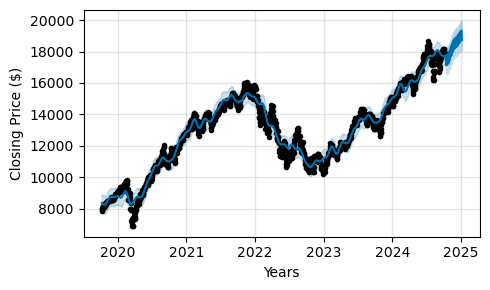

In [53]:
#Steve - Forecast/Predict trend of the NASDAQ index 
# Filter merged_df for NASDAQ only
merged_df_nasdaq = pd.DataFrame(merged_df['comp_close'])

# reset index
merged_df_nasdaq = merged_df_nasdaq.reset_index()
merged_df_nasdaq.head()

# use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_nasdaq = merged_df_nasdaq.rename(columns={'Date':'ds', 'comp_close':'y'})
#merged_df_nasdaq.head()

# create model
modelN = Prophet()
# fit model
modelN.fit(merged_df_nasdaq)

# create dataframe for predictions
nasdaq_predict_df = modelN.make_future_dataframe(periods=90, freq="D")
# display(nasdaq_predict_df).head()
# display(nasdaq_predict_df).tail()

# populate dataframe with predictions
nasdaq_forecast_trends = modelN.predict(nasdaq_predict_df)

#plot the modelN predictions
fig = modelN.plot(nasdaq_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/nasdaqpredict.png')

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

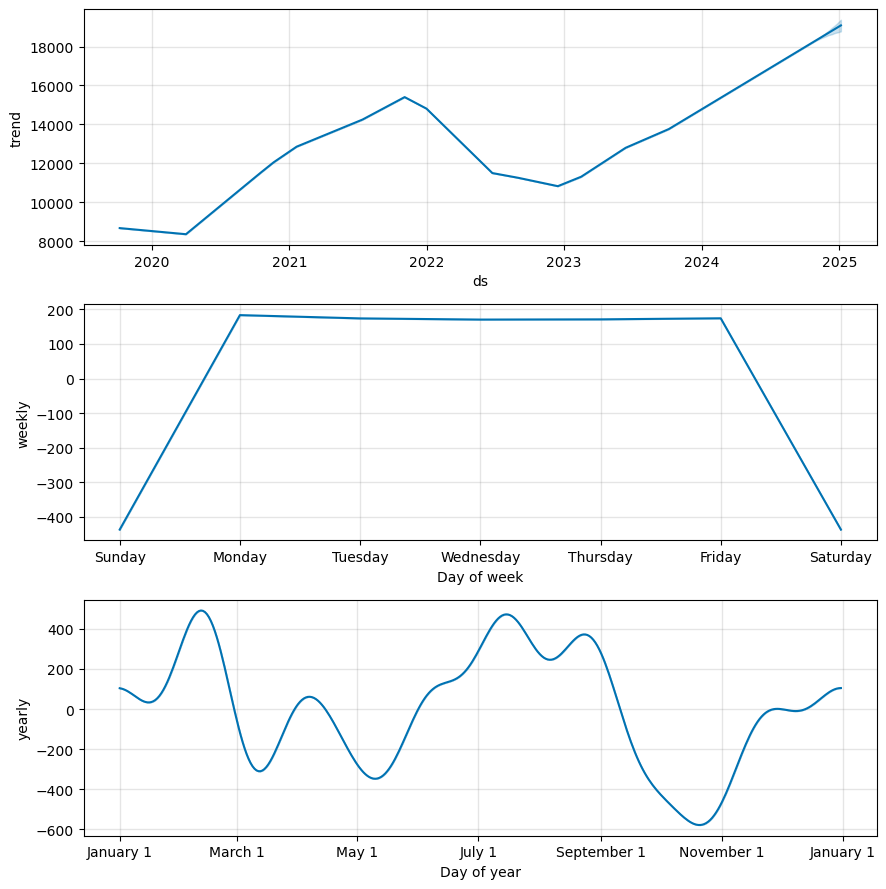

In [57]:
#Steve - Nasdaq trends
# Reset the index in the forecast_nasdaq_trends DataFrame
nasdaq_forecast_trends = nasdaq_forecast_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
modelN.plot_components(nasdaq_forecast_trends);
plt.savefig('Resources/nasdaqforecastcomponents.png')

19:29:45 - cmdstanpy - INFO - Chain [1] start processing
19:29:45 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


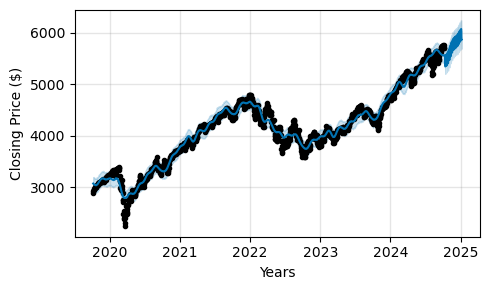

In [55]:
#Steve - Forecast/Predict trend of the SP500 index 
# Filter merged_df for the SP500 only
merged_df_sp500 = pd.DataFrame(merged_df['spx_close'])

# reset index
merged_df_sp500 = merged_df_sp500.reset_index()
merged_df_sp500.head()

# use Prophet to forecast 90 days 
# rename columns for Prophet forecasting
merged_df_sp500 = merged_df_sp500.rename(columns={'Date':'ds', 'spx_close':'y'})
#merged_df_spx.head()

# create model
modelS = Prophet()
# fit model
modelS.fit(merged_df_sp500)

# create dataframe for predictions
sp500_predict_df = modelS.make_future_dataframe(periods=90, freq="D")
# display(spx_predict_df).head()
# display(spx_predict_df).tail()

# populate dataframe with predictions
sp500_forecast_trends = modelS.predict(sp500_predict_df)

#plot the modelN predictions
fig = modelS.plot(sp500_forecast_trends,figsize=(5,3),xlabel='Years',ylabel='Closing Price ($)');
plt.savefig('Resources/sp500predict.png')

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

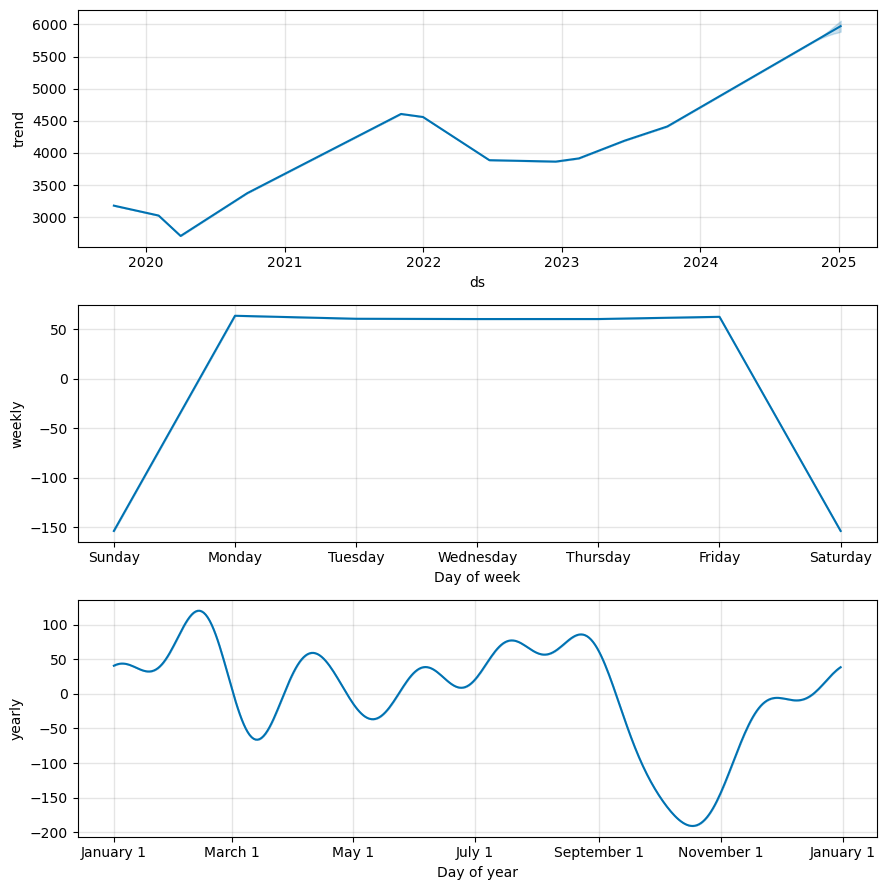

In [58]:
#Steve - S&P500 trends
# Reset the index in the forecast_nasdaq_trends DataFrame
sp500_forecast_trends = sp500_forecast_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
modelS.plot_components(sp500_forecast_trends);
plt.savefig('Resources/sp500forecastcomponents.png')

In [56]:
'''**#Steve Step 5 - Summary:**

The three comparison graphs, below, (Normalized, Daily Percentage Returns & Cumulative Returns) all
follow similar patterns - the NASDAQ, SP500 indices & Microsoft have a positive correlation while
Apple & Google also have positive correlations but these two stocks have increased volatility.  That
is, Apple & Google stocks have greater daily ups & down, increases & decreases in daily 2024 price and
daily precentage increase or percentage loss.
'''

'**#Steve Step 5 - Summary:**\n\nThe three comparison graphs, below, (Normalized, Daily Percentage Returns & Cumulative Returns) all\nfollow similar patterns - the NASDAQ, SP500 indices & Microsoft have a positive correlation while\nApple & Google also have positive correlations but these two stocks have increased volatility.  That\nis, Apple & Google stocks have greater daily ups & down, increases & decreases in daily 2024 price and\ndaily precentage increase or percentage loss.\n'